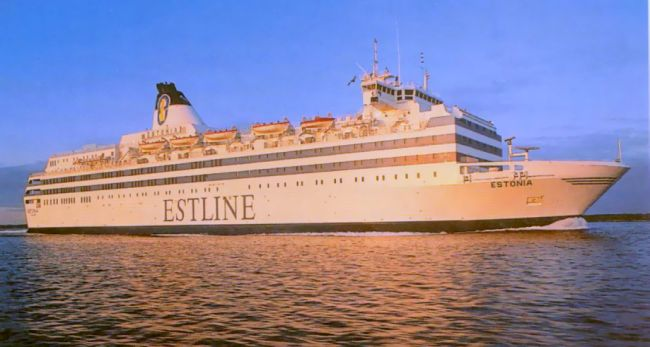

# Contents

- Dataset Information
- Import Libraries
- Read & Check Data
- EDA
- Classification Models

# Dataset Information

- Dataset Name      : MS Estonia Disaster Passenger List
- Dataset Contain   : The full list of all passengers and crew members aboard the MS Estonia.
- Dataset Publisher : Christian Lillelund

- Dataset Columns:
- - PassengerId
- - Country
- - Firstname
- - Lastname
- - Sex
- - Age
- - Category
- - Survived

# Import Libraries

In [ ]:
pip install chart_studio

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import squarify
from wordcloud import WordCloud
import plotly.graph_objs as go

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn import metrics

# Read & Check Data

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
data = pd.read_csv('/kaggle/input/passenger-list-for-the-estonia-ferry-disaster/estonia-passenger-list.csv')

In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
data.info()

## Drop 'PassengerId'

In [ ]:
data.drop('PassengerId',axis=1,inplace=True)

## Check age outliers

In [ ]:
data.boxplot(column=['Age'])

In [ ]:
data['Fullname'] = data['Firstname'] + " " + data['Lastname']
data.drop(['Firstname','Lastname'], axis=1, inplace=True)

In [ ]:
data.head()

## Prepare 'Category' column

In [ ]:
data['Category'] = data['Category'].replace('P',0)
data['Category'] = data['Category'].replace('C',1)

category P = 0
category C = 1

## Prepare 'Sex' column

In [ ]:
data['Sex'] = data['Sex'].replace('M',0)
data['Sex'] = data['Sex'].replace('F',1)

## Add Age Category

In [ ]:
print(max(data['Age']))
print(min(data['Age']))

Class size formule in statistic : 
-                                  k = 1 + 3.3 * log (n) 
-                                  k = 1 + 3.3 * log (989)
-                                  k = 1 + 3.3 * 2.9951
-                                  k = 1 + 9.8838
-                                  k = 10.8838 
-                                  we can choose 10 or 11. I will choose 11.

- (87 - 0)/11 = 7.9090
- round(7.9090) = 8
So it's looking like above :
- k=1  [0-7]
- k=2  [8-15]
- k=3  [16-23]
- k=4  [24-31]
- k=5  [32-39]
- k=6  [40-47]
- k=7  [48-55]
- k=8  [56-63]
- k=9  [64-71]
- k=10 [72-79]
- k=11 [80-87]

In [ ]:
data['Age_Category'] = 0

for i in data.Age.index:
    if data['Age'][i] >=0 and data['Age'][i]<8:        #[0-7]
        data['Age_Category'][i]='0-7'
    elif data['Age'][i] >=8 and data['Age'][i]<16:     #[8-15]
        data['Age_Category'][i]='8-15'
    elif data['Age'][i] >=16 and data['Age'][i]<24:    #[16-23]
        data['Age_Category'][i]='16-23'
    elif data['Age'][i] >=24 and data['Age'][i]<32:    # [24-31]
        data['Age_Category'][i]='24-31'
    elif data['Age'][i] >=32 and data['Age'][i]<40:    #[32-39]
        data['Age_Category'][i]='32-39'
    elif data['Age'][i] >=40 and data['Age'][i]<48:    #[40-47]
        data['Age_Category'][i]='40-47'
    elif data['Age'][i] >=48 and data['Age'][i]<56:    #[48-55]
        data['Age_Category'][i]='48-55'
    elif data['Age'][i] >=56 and data['Age'][i]<64:    #[56-63]
        data['Age_Category'][i]='56-63'
    elif data['Age'][i] >=64 and data['Age'][i]<72:    #[64-71]
        data['Age_Category'][i]='64-71'
    elif data['Age'][i] >=72 and data['Age'][i]<80:    #[72-79]
        data['Age_Category'][i]='72-79'
    else:                                              #[80-87]
        data['Age_Category'][i]='60+'

# EDA

In [ ]:
df = px.data.tips()
fig = px.sunburst(data, path=['Age_Category', 'Survived', 'Country'], values='Age',title='Dont Forget to Click Chart to Examine Deeply' )
fig.show()

## Most Countries

In [ ]:
def bar_plot(column_name,data):
    plt.figure(figsize=(8,8))
    ax = sns.countplot(column_name, data=data)
    ax.set_xlabel(column_name)
    ax.set_ylabel('Frequency')
    print(data[column_name].value_counts())

In [ ]:
bar_plot('Country',data)

## Sex Count 

In [ ]:
print('Sex (0) = Male')
print('Sex (1) = Female')
bar_plot('Sex',data)

## Survived count 

In [ ]:
bar_plot('Survived',data)

## Age Category count

In [ ]:
bar_plot('Age_Category',data=data)

## Survived - Sex Relationship

In [ ]:
def relationship_plot(column_name,hue_name,data):
    plt.figure(figsize=(8,8))
    ax = sns.countplot(column_name,hue=hue_name,data=data)
    ax.set_xlabel(column_name)
    ax.set_ylabel('Frequency')

In [ ]:
print('Sex (0) = Male')
print('Sex (1) = Female')
relationship_plot(column_name='Survived',hue_name='Sex',data=data)

## Category - Survived Relationship

In [ ]:
relationship_plot(column_name='Category',hue_name='Survived', data=data)

## Most Common Regions

In [ ]:
plt.figure(figsize = (20, 12))
squarify.plot(sizes = data.Country.value_counts().values, alpha = 0.8,
              label = data.Country.unique())
plt.title('Most Common Regions', fontsize = 20)
plt.axis('off')
plt.show()

In [ ]:
x2011 = data.Country
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(x2011))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Choropleth Map

In [ ]:
country_names = dict(data['Country'].value_counts()).keys()
country_cases = data['Country'].value_counts().tolist()

country_df = pd.DataFrame()
country_df['Country'] = country_names
country_df['journey'] = country_cases
country_df.head()

In [ ]:
country_df.Country.unique()

In [ ]:
country_df['Country'] = country_df.replace('Sweden','SWE')
country_df['Country'] = country_df.replace('Estonia','EST')
country_df['Country'] = country_df.replace('Latvia','LVA')
country_df['Country'] = country_df.replace('Finland','FIN')
country_df['Country'] = country_df.replace('Russia','RUS')
country_df['Country'] = country_df.replace('Norway','NOR')
country_df['Country'] = country_df.replace('Germany','DEU')
country_df['Country'] = country_df.replace('Denmark','DNK')
country_df['Country'] = country_df.replace('Lithuania','LTU')
country_df['Country'] = country_df.replace('Great Britain','GBR')
country_df['Country'] = country_df.replace('Morocco','MAR')
country_df['Country'] = country_df.replace('Netherlands','NLD')
country_df['Country'] = country_df.replace('Canada','CAN')
country_df['Country'] = country_df.replace('Belarus','BLR')
country_df['Country'] = country_df.replace('France','FRA')
country_df['Country'] = country_df.replace('Nigeria','NGA')

In [ ]:
country_df

In [ ]:
fig = px.choropleth(country_df, locations="Country",
                    color="journey", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

## Category - Age - Survived

In [ ]:
sns.swarmplot(x='Category',y='Age',hue='Survived',data=data)
plt.show()

# Classification Models

## One-Hot Encoded Countries

In [ ]:
data_encoded = pd.get_dummies(data['Country'],prefix_sep = '_')
data = data.drop(['Country'],axis=1)
data = pd.concat([data, data_encoded], axis=1)

In [ ]:
y=data['Survived']
X=data.drop(['Survived','Fullname','Age_Category'], axis=1)

In [ ]:
X.Age = (X.Age - min(X.Age)) / (max(X.Age)- min(X.Age))

In [ ]:
X

## Train-Test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Multinomial Naive Bayes Classifier

In [ ]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
y_pred = mnb.predict(x_test)
print(metrics.classification_report(y_test,y_pred))

## Bernoulli Naive Bayes Classifier

In [ ]:
bnb = BernoulliNB()
bnb.fit(x_train,y_train)
y_pred = bnb.predict(x_test)
print(metrics.classification_report(y_test,y_pred))

## K- Nearest Neighboors Classifier

In [ ]:
score_list = []
each_list = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
for each in range (1,15):
    knn = KNeighborsClassifier(n_neighbors=each)
    knn.fit(x_train,y_train)
    score_list=(knn.score(x_test,y_test))
    print("KNN de {} komsu alinirsa accuracy : {} ".format(each,score_list))

## Logistic Regression 

In [ ]:
lr= LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print(metrics.classification_report(y_test,y_pred))

## Stochastic Gradient Descent Classifier

In [ ]:
sgdc = SGDClassifier(max_iter=1000)
sgdc.fit(x_train,y_train)
y_pred = sgdc.predict(x_test)
print(metrics.classification_report(y_test,y_pred))

## Support Vector Classifier

In [ ]:
svm = SVC()
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
print(metrics.classification_report(y_test,y_pred))

## Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print(metrics.classification_report(y_test,y_pred))

## Ramdom Forest Classifier 

In [ ]:
rf = RandomForestClassifier(max_depth=50)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print(metrics.classification_report(y_test,y_pred))

## Gradient Boosting Classifier

In [ ]:
gbcs = GradientBoostingClassifier()
gbcs.fit(x_train,y_train)
y_pred = gbcs.predict(x_test)
print(metrics.classification_report(y_test,y_pred))

## Ada Boost Classifier

In [ ]:
adabc = AdaBoostClassifier()
adabc.fit(x_train,y_train)
y_pred = adabc.predict(x_test)
print(metrics.classification_report(y_test,y_pred))

## XGBoost Classifier

In [ ]:
clf_xgb = xgb.XGBClassifier()
clf_xgb.fit(x_train, y_train)
y_pred = clf_xgb.predict(x_test)
print(metrics.classification_report(y_test,y_pred))